In [ ]:
"""
Trabalho computacional sobre algoritmos evolutivos para solução de sistemas de equações não lineares 
"""

In [41]:
"""
Sistema de equações não lineares
"""
import numpy as np
import plotly.graph_objects as go
import pandas as pd

from src.equation_system import EquationSystem
from src.ga import real_coded_genetic_algorithm
from src.es import evolution_strategy

p1 = EquationSystem([
    lambda x: 0.8*(x[0]**2 + x[0] -1)*x[2] + 0.12*x[0]**2 + 2.16*x[0] - 0.12,
    lambda x: (1 + x[0]**2)*x[3] + 0.4*x[0]**2 - 1.6*x[0] - 0.4,
    lambda x: (1 + x[0]**2)*x[4] + x[0]**2 - 1,
    lambda x: (1 + x[0]**2)*x[5] + 0.8*(x[0]**2 + x[0] -1),
    lambda x: x[4]*x[6] - 0.02*x[5] - x[4] - x[2]*x[3] - 0.16*x[0],
    lambda x: x[6]**2 - 2*x[3]*x[6] + x[5]**2 + x[3]**2 - x[1]**2,
    lambda x: x[7] - x[1]*x[2],
    lambda x: 0.0476*x[2]*x[7]**12 + x[2] - 2.104
])

# p1 bounds
p1_lb = [-3, -1, -2, -1, -1, -0.5, -1.5, -1.5]
p1_ub = [1, 1, 2, 1, 1, 0.5, 1.5, 1.5]

p2 = EquationSystem([
    lambda x: x[4] + x[3] - 1.803,
    lambda x: (x[1] + x[2])*x[4] + 6.19116*x[3] - 1.803*(1.497 + 0.035),
    lambda x: x[5] + x[3] -0.328,
    lambda x: 0.28801*x[5] - x[1]*x[2]*x[4],
    lambda x: (-6.19116*x[0] + x[0]*x[2] + x[1]*x[4] - x[2]*x[4])*x[5] + x[0]*x[2]*x[4],
    lambda x: 1.571*x[6] + x[3] -1.803,
    lambda x: x[7] - 0.000856*x[6]**2,
    lambda x: (x[4] -x[0])*x[8] - x[0]*x[4],
    lambda x: x[8] - 377*x[1]*x[7]
])

# p2 bounds
p2_lb = [-0.5, -1, -1, -1, 1, -1, -1, 0, -1]
p2_ub = [0.5, 1, 1, 1, 2, 1, 1, 1, 1]

def save_results(score_histories, filename):
    df = pd.DataFrame(score_histories)
    df.columns = [f"iteration_{i}" for i in range(df.shape[1])]
    df = df.reset_index().rename(columns={"index": "epoch"})
    df.epoch = df.epoch + 1
    df.to_csv(filename, index=False)

### GA

#### Problema 01

In [26]:
max_gen = 1000
epochs = 50
idxmin_ga_p1, best_individial_ga_p1, score_histories_ga_p1 = real_coded_genetic_algorithm(
    p1, p1_lb, p1_ub,
    pop_size=50,
    max_gen=max_gen,
    pc=0.8,
    pm=0.1,
    alpha=0.5,
    sigma=0.1,
    elitism=True,
    epochs=epochs,
)

save_results(score_histories_ga_p1, "results/score_histories_ga_p1.csv")

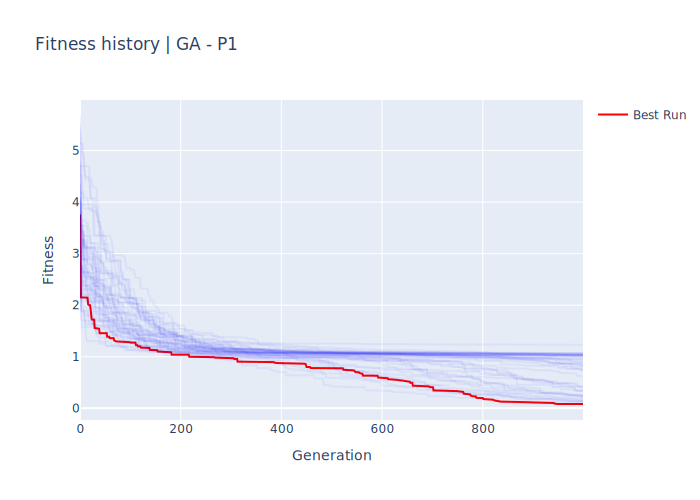

Best individual GA - P1: [ 0.29843694 -1.08071259  1.11754505  0.59119491  0.90452071  0.38764828
  1.60769953 -1.27486645]
Best score P1: 0.08197325340414739


In [27]:
fig = go.Figure()
for i, history in enumerate(score_histories_ga_p1):
    if i == idxmin_ga_p1:
        fig.add_trace(go.Scatter(y=history, mode='lines', opacity=1, line=dict(color='red')))
    else:
        fig.add_trace(go.Scatter(y=history, mode='lines', opacity=0.05, line=dict(color='blue')))

fig.update_layout(title='Fitness history | GA - P1', xaxis_title='Generation', yaxis_title='Fitness')
fig.for_each_trace(lambda trace: trace.update(showlegend=False) if trace.line.color == 'blue' else trace.update(name='Best Run'))
fig.show('svg')

print(f'Best individual GA - P1: {best_individial_ga_p1}')
print(f'Best score P1: {min(score_histories_ga_p1[idxmin_ga_p1])}')

#### Problema 02

In [11]:
idxmin_ga_p2, best_individial_ga_p2, score_histories_ga_p2 = real_coded_genetic_algorithm(
    p2, p2_lb, p2_ub,
    pop_size=50,
    max_gen=1000,
    pc=0.8,
    pm=0.1,
    alpha=0.5,
    sigma=0.1,
    elitism=True,
    epochs=50,
)

save_results(score_histories_ga_p2, "results/score_histories_ga_p2.csv")

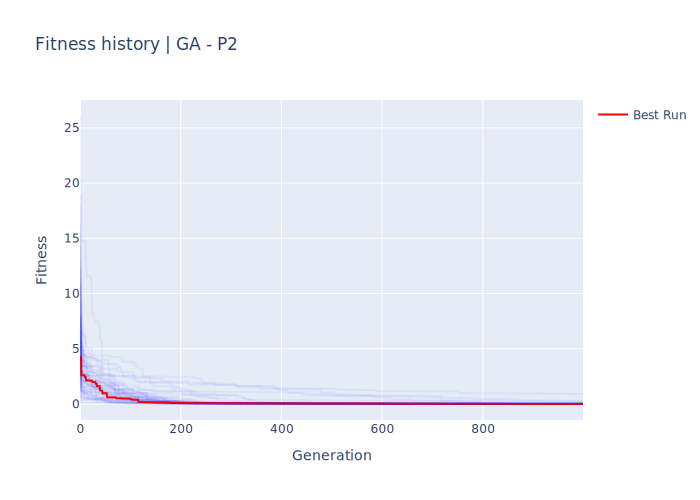

Best individual GA - P2: [-0.05064016 -0.00647161  0.18575858  0.40397774  1.39679847 -0.06896595
  0.8934541   0.0130884  -0.05405791]
Best score P2: 0.0014628980073630707


In [24]:
fig = go.Figure()
for i, history in enumerate(score_histories_ga_p2):
    if i == idxmin_ga_p2:
        fig.add_trace(go.Scatter(y=history, mode='lines', opacity=1, line=dict(color='red')))
    else:
        fig.add_trace(go.Scatter(y=history, mode='lines', opacity=0.05, line=dict(color='blue')))

fig.update_layout(title='Fitness history | GA - P2', xaxis_title='Generation', yaxis_title='Fitness')
fig.for_each_trace(lambda trace: trace.update(showlegend=False) if trace.line.color == 'blue' else trace.update(name='Best Run'))
fig.show('svg')

print(f'Best individual GA - P2: {best_individial_ga_p2}')
print(f'Best score P2: {min(score_histories_ga_p2[idxmin_ga_p2])}')

### Evolution Strategy

#### Problema 01

In [ ]:
idxmin_es_p1, best_individual_es_p1, best_score_es_p1, score_histories_es_p1 = evolution_strategy(
    p1, p1_lb, p1_ub,
    n_iter=5000,
    step_size=0.15,
    mu=20,
    lam=100,
    epochs=50,
)
save_results(score_histories_es_p1, "results/score_histories_es_p1.csv")

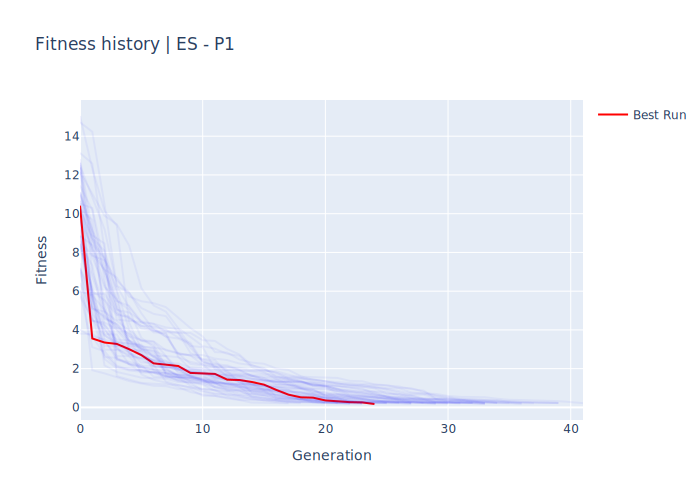

In [8]:
fig = go.Figure()
for i, history in enumerate(score_histories_es_p1):
    if i == idxmin_es_p1:
        fig.add_trace(go.Scatter(y=history, mode='lines', opacity=1, line=dict(color='red')))
    else:
        fig.add_trace(go.Scatter(y=history, mode='lines', opacity=0.05, line=dict(color='blue')))

fig.update_layout(title='Fitness history | ES - P1', xaxis_title='Generation', yaxis_title='Fitness')
fig.for_each_trace(lambda trace: trace.update(showlegend=False) if trace.line.color == 'blue' else trace.update(name='Best Run'))
fig.show('svg')

#### Problema 02

In [ ]:
idxmin_es_p2, best_individual_es_p2, best_score_es_p2, score_histories_es_p2 = evolution_strategy(
    p2, p2_lb, p2_ub,
    n_iter=5000,
    step_size=0.15,
    mu=20,
    lam=100,
    epochs=50,
)

save_results(score_histories_es_p2, "results/score_histories_es_p2.csv")

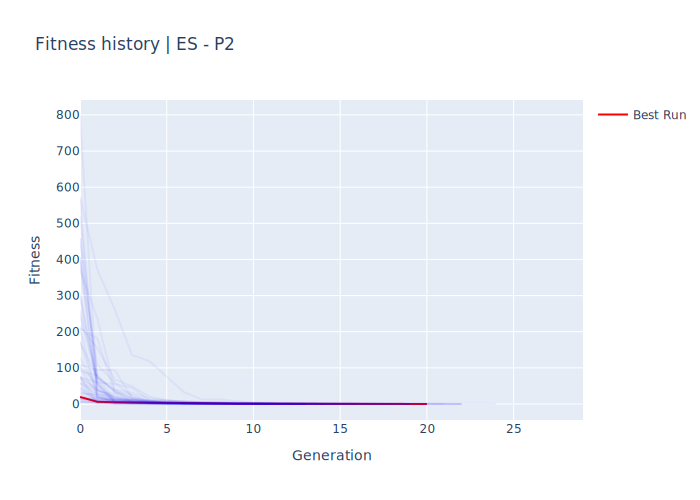

In [45]:
fig = go.Figure()

for i, history in enumerate(score_histories_es_p2):
    if i == idxmin_es_p2:
        fig.add_trace(go.Scatter(y=history, mode='lines', opacity=1, line=dict(color='red')))
    else:
        fig.add_trace(go.Scatter(y=history, mode='lines', opacity=0.05, line=dict(color='blue')))
fig.update_layout(title='Fitness history | ES - P2', xaxis_title='Generation', yaxis_title='Fitness')
fig.for_each_trace(lambda trace: trace.update(showlegend=False) if trace.line.color== 'blue' else trace.update(name='Best Run'))
fig.show('svg')